# 画像メディア工学４回目
## 4. 領域に基づく濃淡変換
### ライブラリの読み込み（おまじない）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Google colaboratoryで利用する場合の画像のアップロード
Google colaboratoryでは，時間がたつと実行環境がリセットされるため，
その時には，画像ファイルのアップロードが必要．

In [2]:
#from google.colab import files
#uploaded_file = files.upload()

### 4.1 Pythonの関数
Pythonでの関数の定義などについて，簡単に紹介しておく．

使い方はＣ言語と同じで，()の中に入力の引数を指定し戻り値が返る．Pythonの関数では，複数個の戻り値を指定することもできる．

（ただし今回の課題では気にしなくてよいです）

In [3]:
# 足し算と引き算を計算する関数
def add_sub_func(a,b):
    return a+b, a-b

呼び出すときは，

In [4]:
res1, res2 = add_sub_func(5,3)
print ("add:", res1)
print ("sub:", res2)

add: 8
sub: 2


### 4.2 領域に基づく変換

### 画像の読み込み

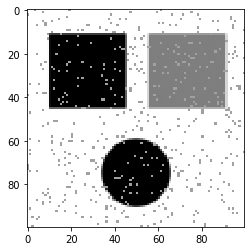

In [5]:
img = cv2.imread('img02.png', 0);  # モノクロ画像として読み込み
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

### 変換用の関数の定義
引数：画像 img, フィルタ filter

戻り値：変換後の画像

In [6]:
def filter_3x3(img, filter):    
    
    # h: 画像の高さ, w: 画像の幅
    h,w = img.shape
    
    # フィルタ処理後の画像の準備
    resimg = np.zeros((h,w))
    
    # 画像の端はスキップ
    for i in range(1,h-1):
        for j in range(1,w-1):
            
            # 画像とフィルタの積和計算
            val = 0
            for k in range(-1,2):
                for l in range(-1,2):
                    val += img[i+k,j+l] * filter[k+1,l+1]

            # 変換後画像に代入
            resimg[i,j] = val
    
    return resimg

フィルタの定義と関数の呼び出し（ここでは単純な平均化フィルタを定義）

In [7]:
#filter = np.ones((3,3))/9
filter = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])/9
print(filter)

resimg = filter_3x3(img, filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


実際にプログラムを書くときには，cv2.filter2D関数を使うと良い．そちらの方が高速に実行できる

In [8]:
# resimg = cv2.filter2D(img, -1, filter)

### 画像の表示
ここでは，入力と変換結果を横並びで描画するために，plt.subplot関数を使用している．

plt.subplot(1,2,1)は，描画領域を縦1行，横2列に分割し，1番目に描画せよ，という意味．

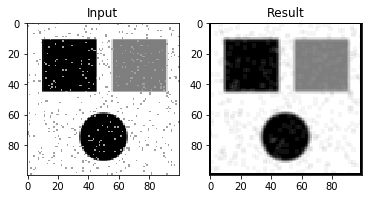

In [9]:
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
plt.title("Input")
plt.subplot(1,2,2)
plt.imshow(resimg, cmap='gray', vmin = 0, vmax = 255)
plt.title("Result");

### 課題
以下のプログラム中のfilter1,filter2を完成させて，ソーベルフィルタが微分と平滑化の組み合わせからなっていることを確認してください。

課題としては，filter1, filter2の定義部分を提出してください．

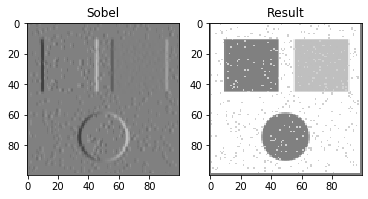

In [10]:
# 比較用のソーベルフィルタ（横方向）
sobelfilter = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])/8
resimg = filter_3x3(img, sobelfilter)

##### 提出部分　ここから
# 微分フィルタ（横方向）にしてください
filter1 = np.array([[0,0,0],
                    [0,1,0],
                    [0,0,0]])

# 平滑化フィルタ（横方向の微分に適したもの）にしてください
filter2 = np.array([[0,0,0],
                    [0,1,0],                    
                    [0,0,0]])
##### ここまで

resimg1 = filter_3x3(img,     filter1) # 微分フィルタの適用
resimg2 = filter_3x3(resimg1, filter2) # 平滑化フィルタの適用

# 結果の表示
plt.subplot(1,2,1)
plt.imshow(resimg, cmap='gray', vmin = -255, vmax = 255)
plt.title("Sobel")
plt.subplot(1,2,2)
plt.imshow(resimg2, cmap='gray', vmin = -255, vmax = 255)
plt.title("Result");